<a href="https://colab.research.google.com/github/njiririkinyanjui/Blog_Analysis_Using_R/blob/main/Blog_Analysis_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Question**

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

Using the Male column wich individual is moree likely to visit the site

# **Loading the dataset and Previewing**

In [1]:
# Loading the relevant libraries

install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Calling the relevant libraries

library(tidyverse)
# The library contains most of the packages we'll require like tidyr and ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# Calling an additional package

library(dplyr)

In [4]:
# Reading the dataset

df <- read_csv("/content/advertising.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)




In [5]:
# attaching our columns to the timephase of the run 

attach(df)

In [6]:
# Previewing the head of the dataset

head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [7]:
# Previewing the tail of the dataset

tail(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [8]:
# Finding the type of our dataset

class(df)

# The dataset is a dataframe
# It is still a data.frame, but a special kind of data.frame, i.e. a tibble data.frame.
# When printing a tibble data.frame, only the first 10 rows will be printed by default, 
# and variables that don’t fit within the width of the page or console will be hidden.

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [9]:
# Calling the columns

names(df)

# Below are the column names 

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [10]:
print(df, n = Inf, width = Inf)

# Prints the Each variables of the dataset first


# A tibble: 1,000 x 10
     `Daily Time Spent on Site`   Age `Area Income` `Daily Internet Usage`
                          <dbl> <dbl>         <dbl>                  <dbl>
   1                       69.0    35        61834.                   256.
   2                       80.2    31        68442.                   194.
   3                       69.5    26        59786.                   236.
   4                       74.2    29        54806.                   246.
   5                       68.4    35        73890.                   226.
   6                       60.0    23        59762.                   227.
   7                       88.9    33        53853.                   208.
   8                       66      48        24593.                   132.
   9                       74.5    30        68862                    222.
  10                       69.9    20        55642.                   184.
  11                       47.6    49        45633.                   122.
  

## Data cleaning

In [102]:
# To fix a dataframe (or any other named structure) “df” that already has names containing spaces and/or commas:

#names(df)<-str_replace_all(names(df), c(" " = "" ))

In [11]:
# Finding the missing values of the dataset
# Prints a boolen type of either true or false

is.na(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [12]:
# Finding the total missing values in the dataset per column

colSums(is.na(df))

# Theres no missing data in our dataset

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

In [13]:
# Checking for duplicates

any(duplicated(df))

# There are no duplicates in our dataset

[1] FALSE

In [14]:
# Showing the dataset

str(df)

tibble [1,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Daily Time Spent on Site: num [1:1000] 69 80.2 69.5 74.2 68.4 ...
 $ Age                     : num [1:1000] 35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num [1:1000] 61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num [1:1000] 256 194 236 246 226 ...
 $ Ad Topic Line           : chr [1:1000] "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr [1:1000] "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : num [1:1000] 0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr [1:1000] "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct[1:1000], format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : num [1:1000] 0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   `

In [15]:
# This function is the dplyr-alternative to the well-known str function for base R, 
# and is thus helpful for a first inspection of the data set at hand.

glimpse(df)

Rows: 1,000
Columns: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, …
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49…
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73…
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 22…
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "Mon…
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", "W…
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, …
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy",…
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:02,…
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, …


In [16]:
# Shape of the dataset

dim(df)

# Our dataset contains 1000 rows and 10 columns

[1] 1000   10

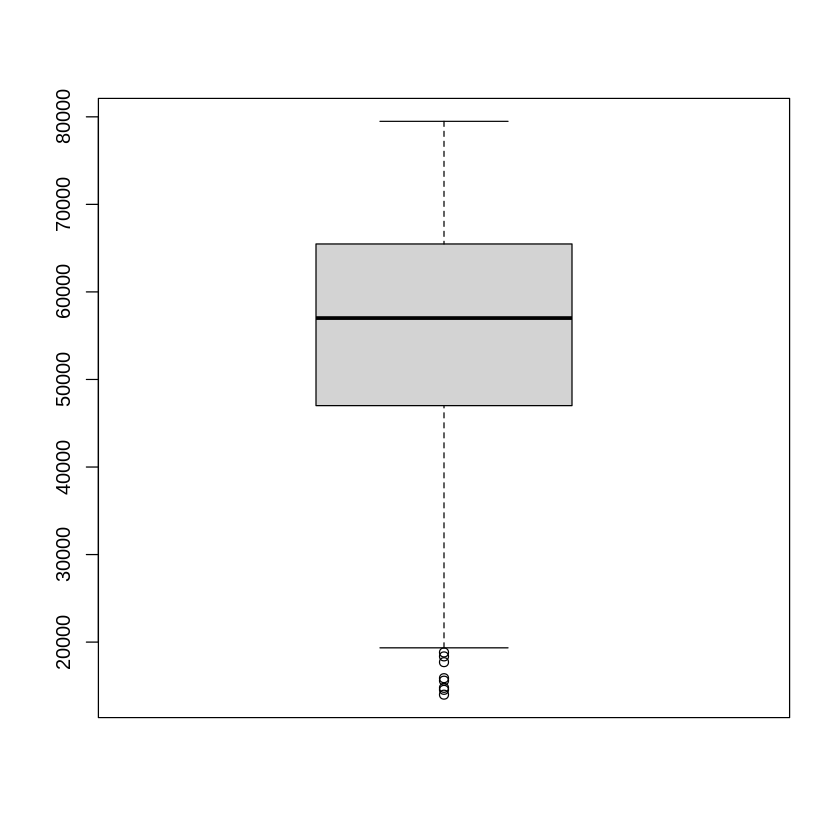

In [17]:
# Checking for outliers

boxplot(`Area Income`)

# Few otliers noted 

In [18]:
# Showing the outliers in area income
boxplot.stats(`Area Income`)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

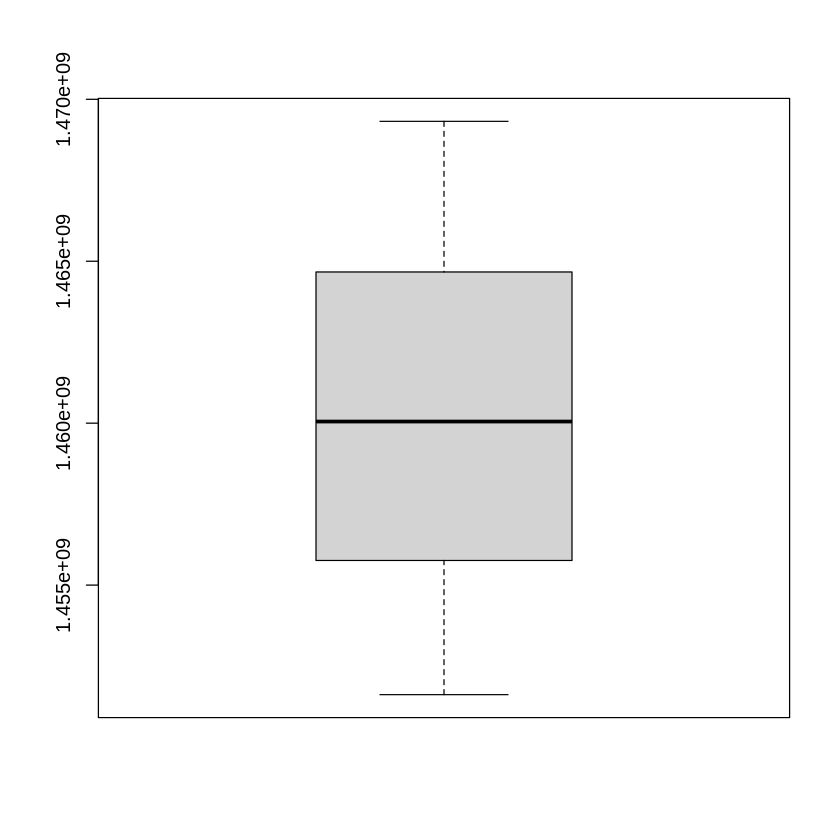

In [19]:
boxplot(Timestamp)
# No outliers on timestamp

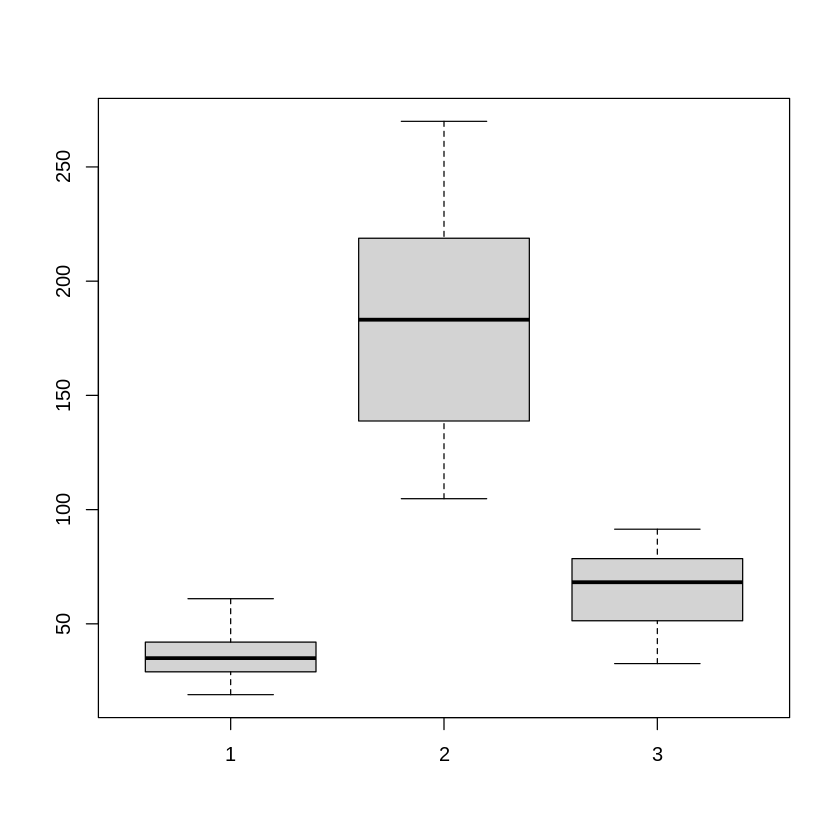

In [20]:
# A boxplot for Age, Daily Internet usage and Daily time spent on site

boxplot(df$Age, df$`Daily Internet Usage`, df$`Daily Time Spent on Site`)

# **EDA**

## Univariate

In [23]:
names(df)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [21]:
# Shows the mean, median, minimum, maximum, mode, 1st and 3rd quartile of each numeric column in the dataset
# Measures of centrality are mean, median. 
# Measures of spread are standard deviation, quantiles, min and max, range, interquartile range.

summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [23]:
# This function provides the ones most useful for scale construction and item analysis in classic psychometrics. 
# Range is most useful for the first pass in a data set, to check for coding errors.

install.packages("psych")
library(psych)
describe(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Daily Time Spent on Site,1,1000,65.0002,1.585361e+01,68.215,65.74090,17.92463,32.60,91.43,58.83,-0.370645950,-1.0998638,0.50133531
Age,2,1000,36.0090,8.785562e+00,35.000,35.50625,8.89560,19.00,61.00,42.00,0.477705222,-0.4097066,0.27782387
Area Income,3,1000,55000.0001,1.341463e+04,57012.300,56038.93815,13316.62424,13996.50,79484.80,65488.30,-0.648422850,-0.1110924,424.20797488
Daily Internet Usage,4,1000,180.0001,4.390234e+01,183.130,179.98620,58.61459,104.78,269.96,165.18,-0.033436814,-1.2757525,1.38831387
Ad Topic Line*,5,1000,500.5000,2.888194e+02,500.500,500.50000,370.65000,1.00,1000.00,999.00,0.000000000,-1.2036006,9.13327251
City*,6,1000,487.3230,2.793116e+02,485.500,487.51125,356.56530,1.00,969.00,968.00,-0.002957293,-1.1893592,8.83260741
Male,7,1000,0.4810,4.998889e-01,0.000,0.47625,0.00000,0.00,1.00,1.00,0.075940878,-1.9962262,0.01580787
Country*,8,1000,116.4090,6.994214e+01,114.500,115.81875,89.69730,1.00,237.00,236.00,0.076151967,-1.2328105,2.21176482
Timestamp,9,1000,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


* The skewness and Kurtosis are defined above.
* Daily Time Spent on Site, Area Income, Daily internet usage are negtively skewed, i.e. they are skewed to the left while the other variables / columns are skewed to the right / positively skewed


* The variables of the df object returned by describe() are as follows.
-- n : number of observations excluding missing values
-- na : number of missing values
-- mean : arithmetic average
-- sd : standard devation
-- se_mean : standrd error mean. sd/sqrt(n)
-- IQR : interquartile range (Q3-Q1)
-- skewness : skewness
-- kurtosis : kurtosis

* The following we're shown 
-- p25 : Q1. 25% percentile
-- p50 : median. 50% percentile
-- p75 : Q3. 75% percentile
-- p01, p05, p10, p20, p30 : 1%, 5%, 20%, 30% percentiles
-- p40, p60, p70, p80 : 40%, 60%, 70%, 80% percentiles
-- p90, p95, p99, p100 : 90%, 95%, 99%, 100% percentiles

In [24]:
# Variance and standard deviation of the dataset
install.packages("pander")
library(pander)
mpg %>%
    summarize(variable = "Daily Time Spent on Site", Variance = var(`Daily Time Spent on Site`), Standard_Deviation = sd(`Daily Time Spent on Site`)) %>%
    pander
var(`Daily Time Spent on Site`)
sd(`Daily Time Spent on Site`)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





|         variable         | Variance | Standard_Deviation |
|:------------------------:|:--------:|:------------------:|
| Daily Time Spent on Site |  251.3   |       15.85        |



[1] 251.3371

[1] 15.85361

In [25]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Age", Variance = var(Age), Standard_Deviation = sd(Age)) %>%
    pander
var(Age)
sd(Age)



| variable | Variance | Standard_Deviation |
|:--------:|:--------:|:------------------:|
|   Age    |  77.19   |       8.786        |



[1] 77.18611

[1] 8.785562

In [26]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Area Income", Variance = var(`Area Income`), Standard_Deviation = sd(`Area Income`)) %>%
    pander
var(`Area Income`)
sd(`Area Income`)



|  variable   | Variance | Standard_Deviation |
|:-----------:|:--------:|:------------------:|
| Area Income | 1.8e+08  |       13415        |



[1] 179952406

[1] 13414.63

In [27]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Daily Internet Usage", Variance = var(`Daily Internet Usage`), Standard_Deviation = sd(`Daily Internet Usage`)) %>%
    pander
var(`Daily Internet Usage`)



|       variable       | Variance | Standard_Deviation |
|:--------------------:|:--------:|:------------------:|
| Daily Internet Usage |   1927   |        43.9        |



[1] 1927.415

In [28]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Timestamp", Variance = var(Timestamp), Standard_Deviation = sd(Timestamp)) %>%
    pander
var(Timestamp)
sd(Timestamp)



| variable  | Variance  | Standard_Deviation |
|:---------:|:---------:|:------------------:|
| Timestamp | 2.591e+13 |      5089978       |



[1] 2.590788e+13

[1] 5089978

In [29]:
# Variance and standard deviation of the dataset
mpg %>%
    summarize(variable = "Click On Ad", Variance = var(`Clicked on Ad`), Standard_Deviation = sd(`Clicked on Ad`)) %>%
    pander
var(`Clicked on Ad`)
sd(`Clicked on Ad`)



|  variable   | Variance | Standard_Deviation |
|:-----------:|:--------:|:------------------:|
| Click On Ad |  0.2503  |       0.5003       |



[1] 0.2502503

[1] 0.5002502

* The pander function came again on a new line, using the same indentation as summarize.

In [30]:
# A frequency table of Country

table(Country)

# Czech Republic, France had 9 searches
# Senegal, Afghanistan, Cyprus, Greece, Liberia, Peru, South AFrica, Turkey had 8 searches
# Andorra, Argentina had 2 searches
# Aruba, Bermuda,  had 1 search
# All other ccountries ranged from 7 to 1

Country
                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                      

In [31]:
# A frequency table of Male as a percentage

table(Male) / 1000

# AT least 51.9% of the data is male while 48.1% are females

Male
    0     1 
0.519 0.481 

In [32]:
# A frequency table of Clicked On Ad as a percentage

table(`Clicked on Ad`) / 1000

# Theres an equal probability of those who clicked on the add and who didn't click on the add.

Clicked on Ad
  0   1 
0.5 0.5 

In [33]:
# A frequency table of Ad topic line
# Categorical variables are summarised with the frequency or a proportion.

table(`Ad Topic Line`)

# Each individual had a unique topic to search
# No similar topics observed

Ad Topic Line
                      Adaptive 24hour Graphic Interface 
                                                      1 
                         Adaptive asynchronous attitude 
                                                      1 
                 Adaptive context-sensitive application 
                                                      1 
                Adaptive contextually-based methodology 
                                                      1 
                   Adaptive demand-driven knowledgebase 
                                                      1 
                            Adaptive uniform capability 
                                                      1 
                             Advanced 24/7 productivity 
                                                      1 
                      Advanced 5thgeneration capability 
                                                      1 
                       Advanced didactic conglomeration 
                 

In [34]:
# A frequency table of age as a percentage

table(Age) / 1000

# A frequency table of Age 

table(Age)

# 31 was the dominant age with atleast 60 people followed by age 36 which had 50.
# This contributed to 0.060 and 0.050 of the entire count assuming the total count is 1

Age
   19    20    21    22    23    24    25    26    27    28    29    30    31 
0.006 0.006 0.006 0.013 0.019 0.021 0.027 0.037 0.033 0.048 0.048 0.039 0.060 
   32    33    34    35    36    37    38    39    40    41    42    43    44 
0.038 0.043 0.039 0.039 0.050 0.036 0.037 0.030 0.036 0.032 0.026 0.023 0.021 
   45    46    47    48    49    50    51    52    53    54    55    56    57 
0.030 0.018 0.013 0.016 0.018 0.020 0.012 0.015 0.010 0.009 0.007 0.002 0.006 
   58    59    60    61 
0.004 0.002 0.004 0.001 

Age
19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 
 6  6  6 13 19 21 27 37 33 48 48 39 60 38 43 39 39 50 36 37 30 36 32 26 23 21 
45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 
30 18 13 16 18 20 12 15 10  9  7  2  6  4  2  4  1 

In [35]:
# A frequency table of Daily Internet Usage

table(`Daily Internet Usage`)

# Each individual had a unique amount of consumption of internet usage
# A better analysis can be used if we can group the internet usage in groups

Daily Internet Usage
104.78    105 105.04 105.15 105.22 105.63 105.69 105.71 105.86 105.94 106.04 
     1      1      1      1      1      1      1      1      1      1      1 
106.86 106.96 107.19 107.56 107.92 108.03  108.1 108.15 108.16 108.17 108.18 
     1      1      1      1      1      1      1      1      1      1      1 
108.25 108.27  108.7 108.85    109 109.04 109.07 109.22 109.29 109.34 109.77 
     1      1      1      1      1      1      1      1      1      1      1 
109.98 110.25 110.57 110.66 110.68 110.84 110.93 111.02 111.59 111.63 111.71 
     1      1      1      1      1      1      1      1      1      1      1 
 111.8 111.94 112.19 112.52 112.72 113.12 113.53 113.69  113.7 113.75  113.8 
     1      1      1      1      1      1      2      1      1      1      1 
114.53 114.69 114.85 115.26 115.35 115.37  115.6 115.79 115.91 116.07 116.19 
     1      1      1      1      1      1      1      1      2      1      1 
116.27 116.38 116.53  117.3 117.33 117.35 1

## Bivariate analysis

In [36]:
# Pearson correlation matrix for the numeric variables
cor(df[,1:4])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.3315133,0.3109544,0.5186585
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086
Area Income,0.3109544,-0.1826050,1.0000000,0.3374955
Daily Internet Usage,0.5186585,-0.3672086,0.3374955,1.0000000


In [37]:
# Spearman correlation matrix for the numeric variables
cor(df[,1:4], method = "spearman")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.3168616,0.2831344,0.5141081
Age,-0.3168616,1.0000000,-0.1359540,-0.3708639
Area Income,0.2831344,-0.1359540,1.0000000,0.3391602
Daily Internet Usage,0.5141081,-0.3708639,0.3391602,1.0000000


In [38]:
# Kendall correlation matrix for the numeric variables
cor(df[,1:4], method = "kendall")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.0000000,-0.1966866,0.1657812,0.2932360
Age,-0.1966866,1.0000000,-0.0800581,-0.2324461
Area Income,0.1657812,-0.0800581,1.0000000,0.2083755
Daily Internet Usage,0.2932360,-0.2324461,0.2083755,1.0000000


* Pearson and spearman correlation don't seem to differ much
* They produce nearly similar results if rounder to 1 decimal place

In [ ]:
# apply the Pearson's product-moment correlation correlation function 

cor.test(`Daily Time Spent on Site`, `Daily Internet Usage`)
# Produces a variety of results from the p-value, 95% Confidence Interval, the degrees of freedom (df) and also the hypothesis under testing 


	Pearson's product-moment correlation

data:  Daily Time Spent on Site and Daily Internet Usage
t = 19.164, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4718365 0.5625633
sample estimates:
      cor 
0.5186585 


In [39]:
# A covariance matrix for the numeric variables
cov(df[,1:4])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,251.33709,-46.17415,66130.81,360.9919
Age,-46.17415,77.18611,-21520.93,-141.6348
Area Income,66130.81091,-21520.92580,179952405.95,198762.5315
Daily Internet Usage,360.99188,-141.63482,198762.53,1927.4154


The following objects are masked from df (pos = 5):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



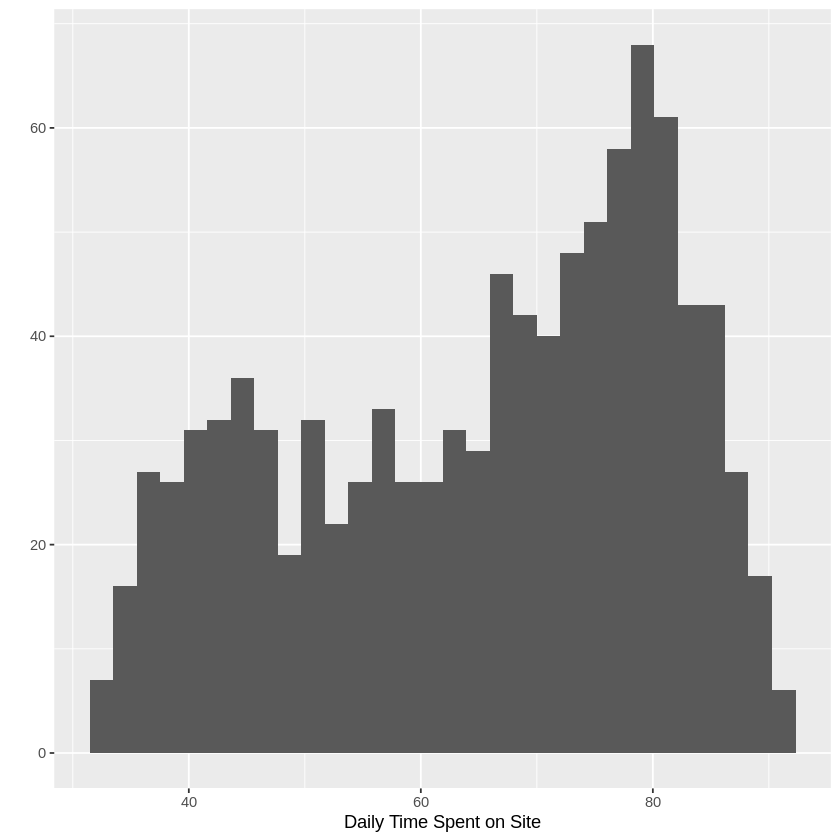

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



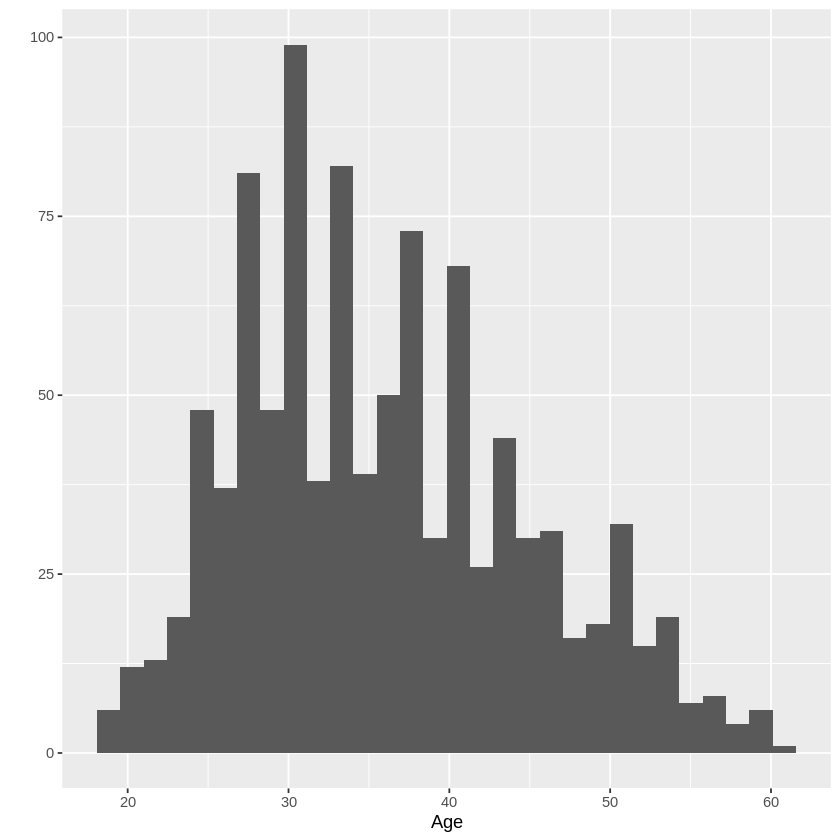

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



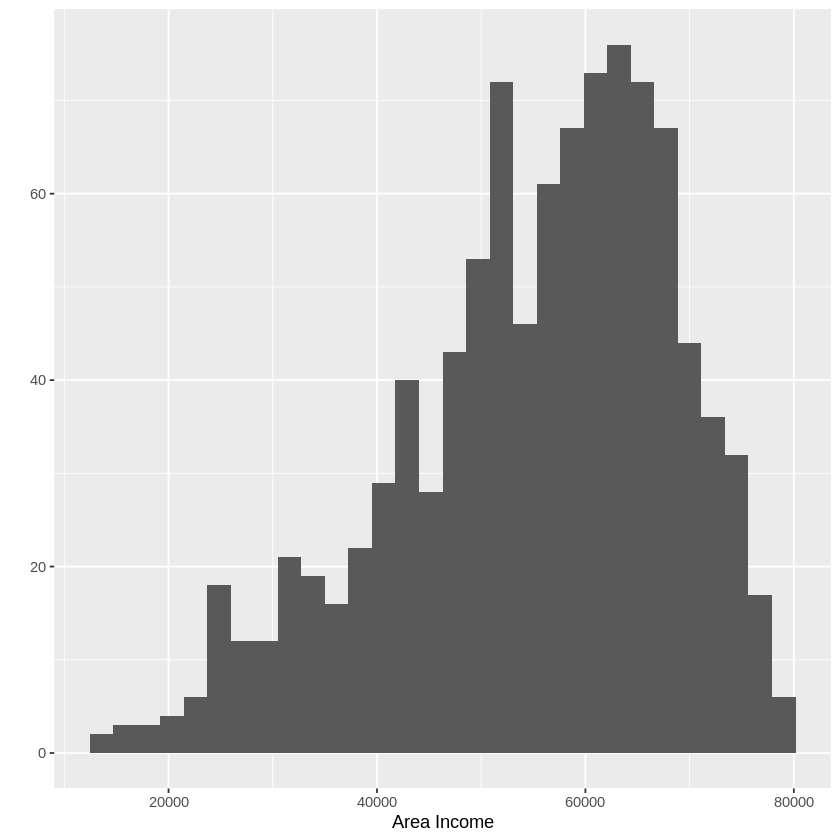

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



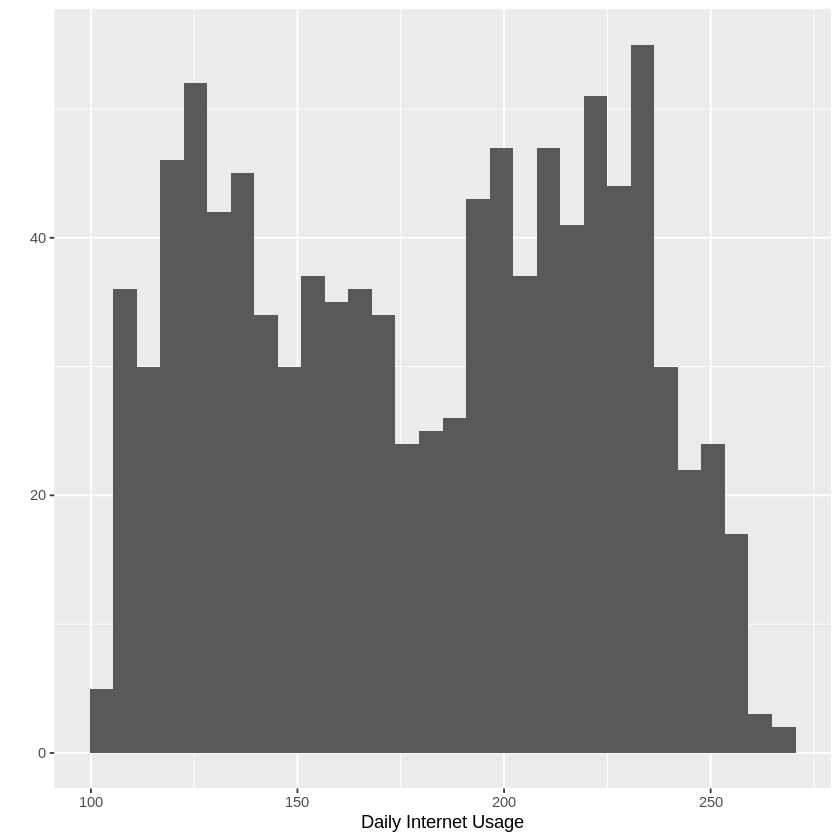

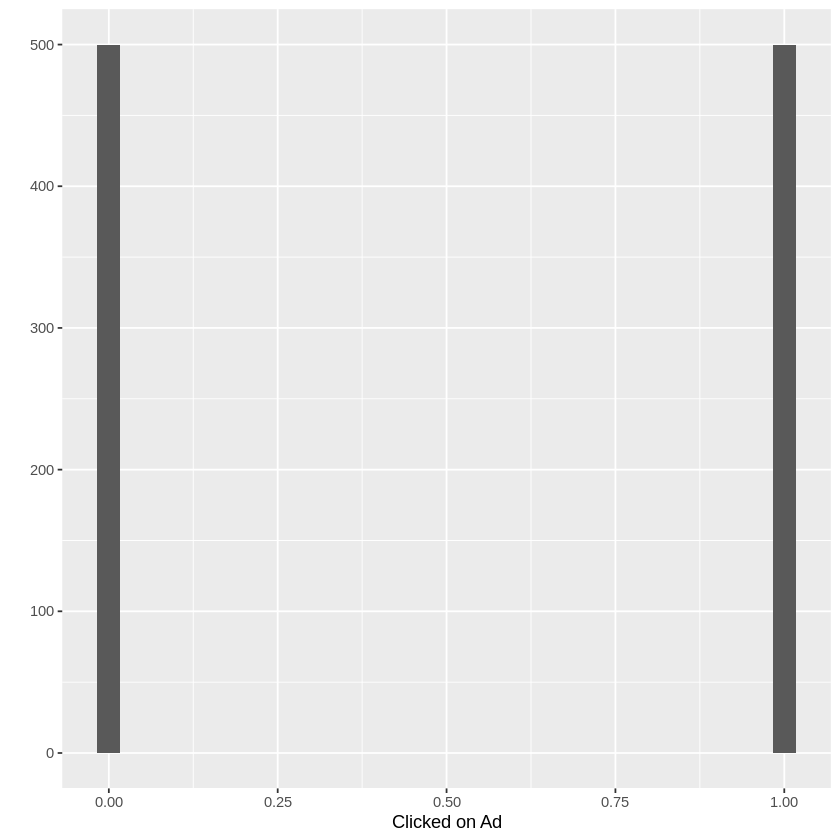

In [40]:
# A qplot of the df dataset

library(ggplot2)

attach(df)
par(mfrow=c(3,1))

qplot(`Daily Time Spent on Site`)
qplot(Age)
qplot(`Area Income`)
qplot(`Daily Internet Usage`)
qplot(`Clicked on Ad`)

The following objects are masked from df (pos = 3):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 6):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp




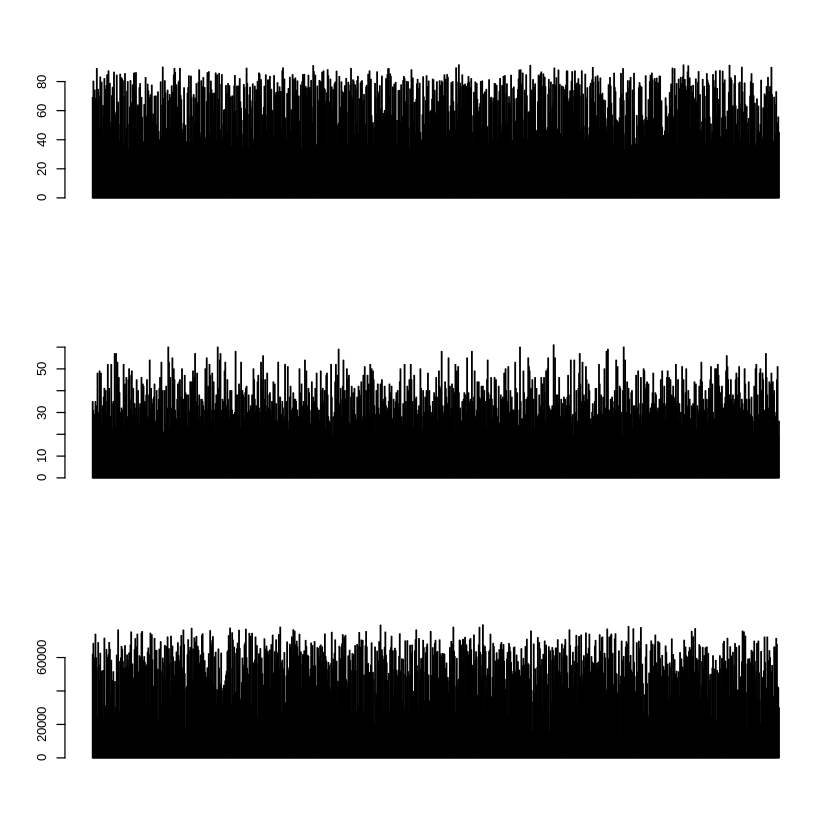

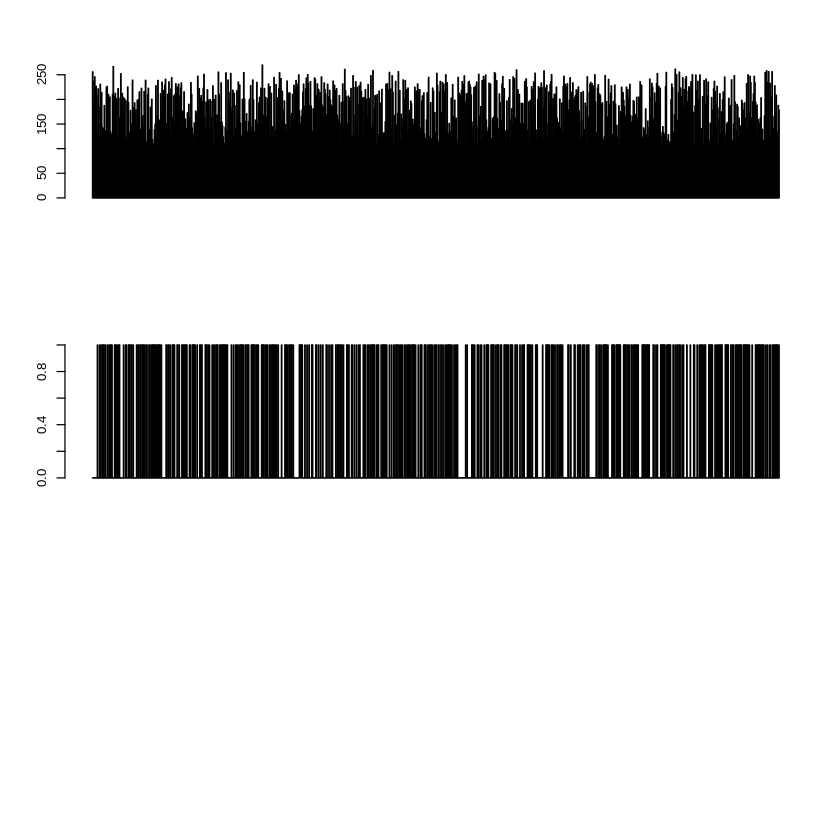

In [41]:
# 3 figures arranged in 3 rows and 1 column
# Combined barplot for the numeric dataset

attach(df)
par(mfrow=c(3,1))
barplot(`Daily Time Spent on Site`)
barplot(Age)
barplot(`Area Income`)
barplot(`Daily Internet Usage`)
barplot(`Clicked on Ad`)

The following objects are masked from df (pos = 3):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 4):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 7):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp




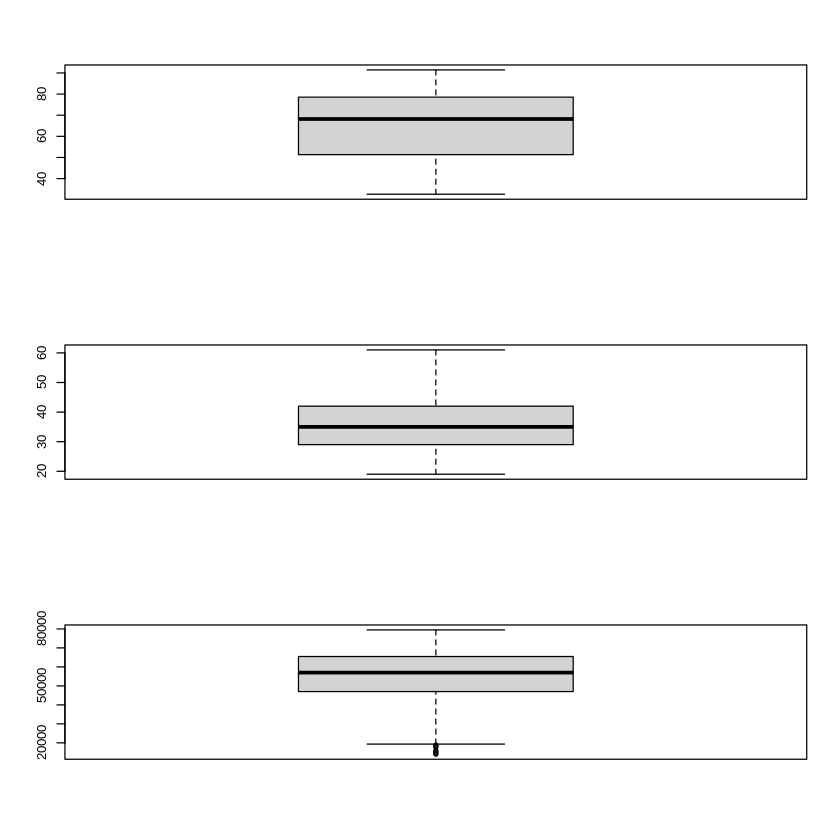

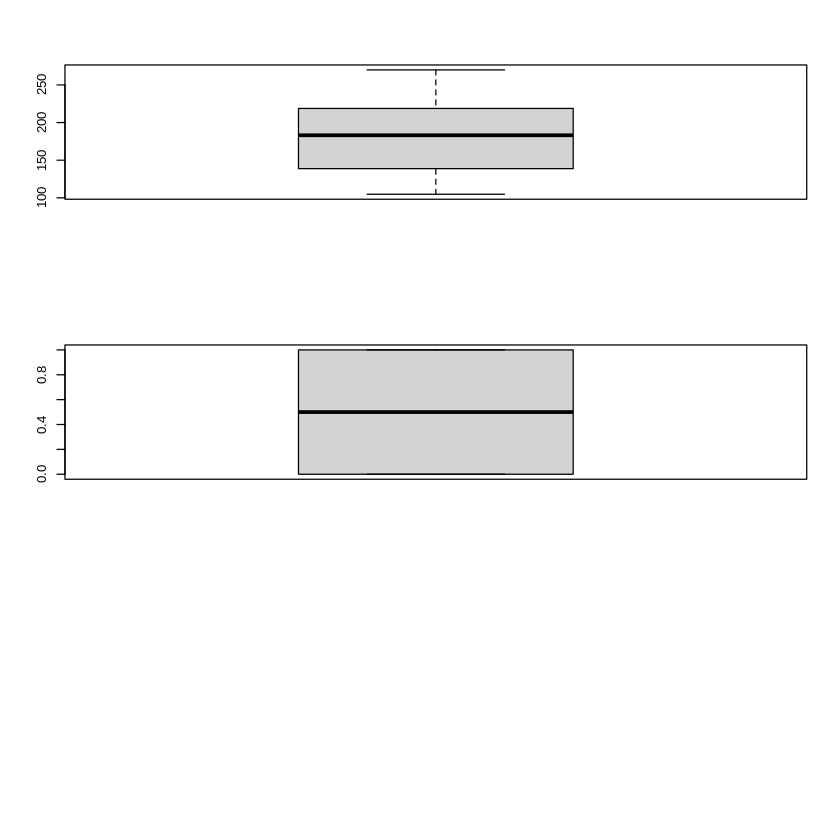

In [42]:
# 3 figures arranged in 3 rows and 1 column
# Combined boxplot for the numeric dataset

attach(df)
par(mfrow=c(3,1))
boxplot(`Daily Time Spent on Site`)
boxplot(Age)
boxplot(`Area Income`)
boxplot(`Daily Internet Usage`)
boxplot(`Clicked on Ad`)

The following objects are masked from df (pos = 3):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 4):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 5):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp


The following objects are masked from df (pos = 8):

    Ad Topic Line, Age, Area Income, City, Clicked on Ad, Country,
    Daily Internet Usage, Daily Time Spent on Site, Male, Timestamp




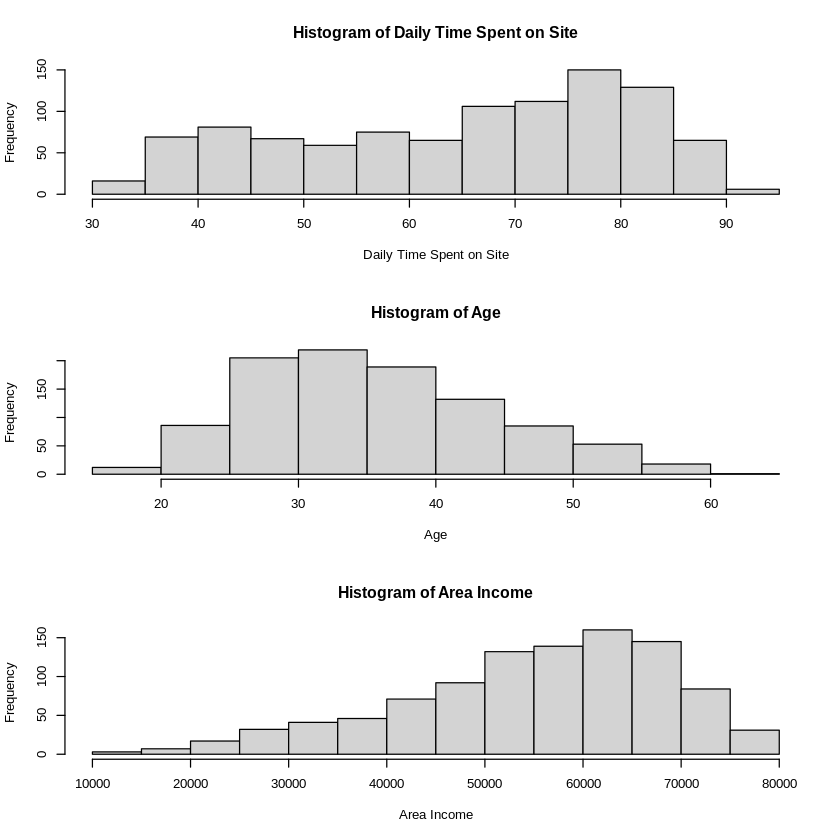

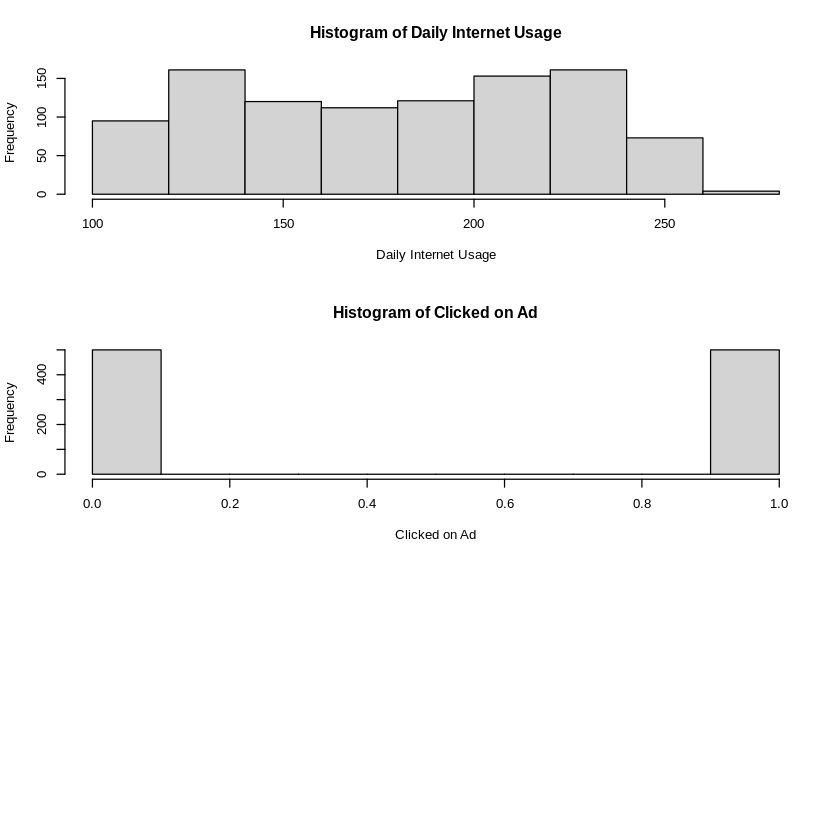

In [43]:
# 3 figures arranged in 3 rows and 1 column
attach(df)
par(mfrow=c(3,1))
hist(`Daily Time Spent on Site`)
hist(Age)
hist(`Area Income`)
hist(`Daily Internet Usage`)
hist(`Clicked on Ad`)

# **Without the categorical columns**

In [44]:
head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [45]:
# remove Categorical variables
library(tidyverse)
dat <- df %>%
  select(-Country, -City, -("Ad Topic Line"), -("Timestamp"))

# display 5 first obs. of new dataset
head(dat, 5)


Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0


In [46]:
# correlation for all variables
round(cor(dat),
  digits = 2 # rounded to 2 decimals
)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.00,-0.33,0.31,0.52,-0.02,-0.75
Age,-0.33,1.00,-0.18,-0.37,-0.02,0.49
Area Income,0.31,-0.18,1.00,0.34,0.00,-0.48
Daily Internet Usage,0.52,-0.37,0.34,1.00,0.03,-0.79
Male,-0.02,-0.02,0.00,0.03,1.00,-0.04
Clicked on Ad,-0.75,0.49,-0.48,-0.79,-0.04,1.00


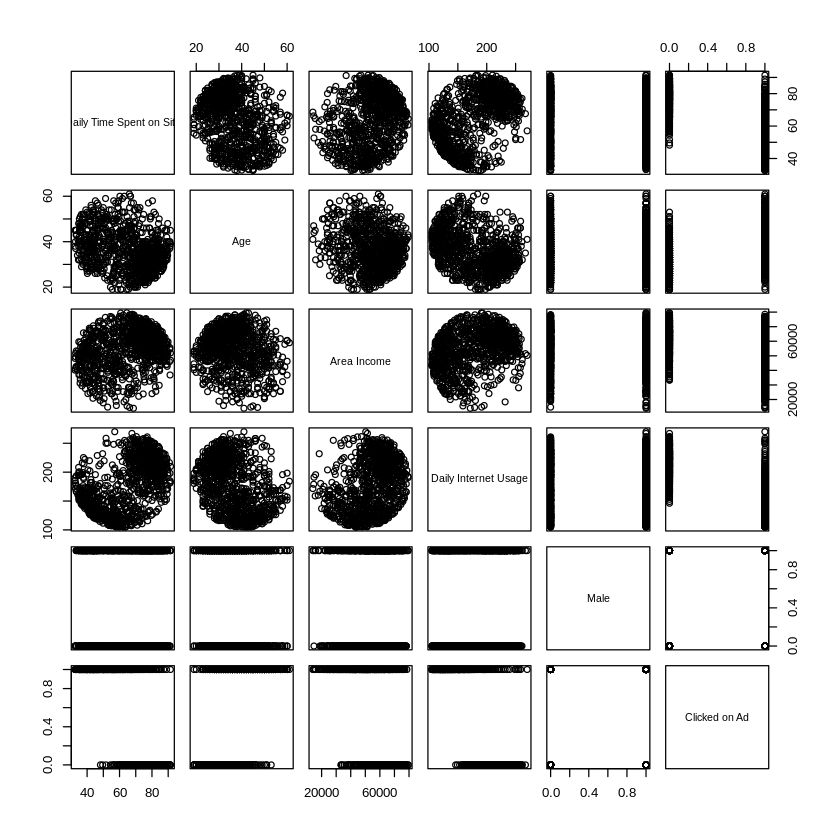

In [47]:
# multiple scatterplots
pairs(dat[, c(1, 2, 3, 4, 5, 6)])

#plot(dat)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



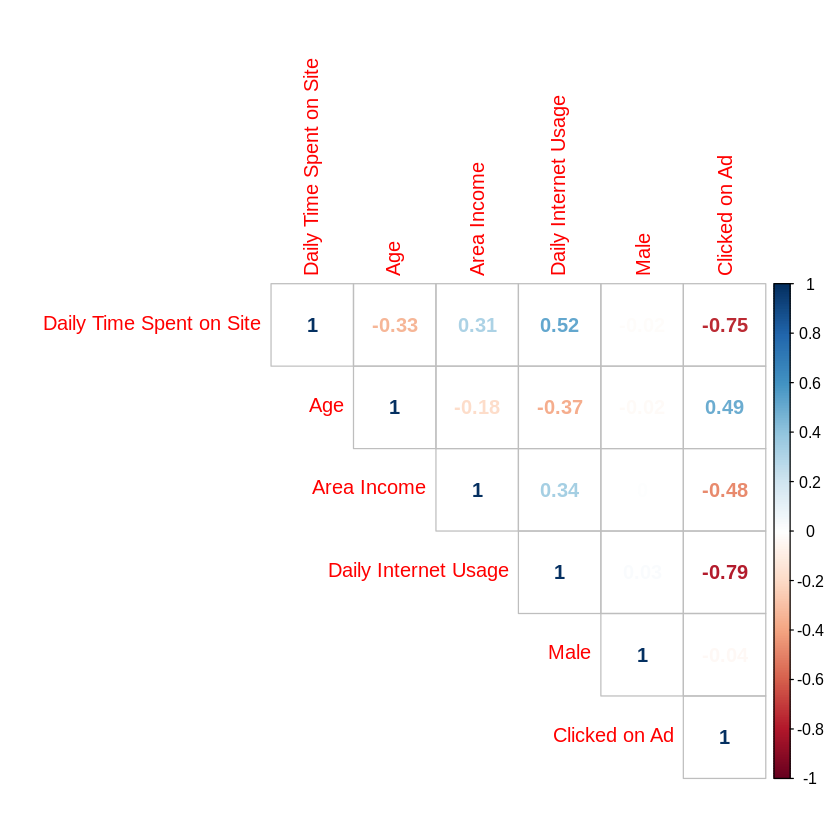

In [48]:
# improved correlation matrix
install.packages("corrplot")
library(corrplot)

corrplot(cor(dat),
  method = "number",
  type = "upper" # show only upper side
)

In [97]:
# A correlation matrix of the dataset

cor(dat)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.00000000,-0.33151334,0.310954413,0.51865848,-0.018950855,-0.74811656
Age,-0.33151334,1.00000000,-0.182604955,-0.36720856,-0.021044064,0.49253127
Area Income,0.31095441,-0.18260496,1.000000000,0.33749553,0.001322359,-0.47625463
Daily Internet Usage,0.51865848,-0.36720856,0.337495533,1.00000000,0.028012326,-0.78653918
Male,-0.01895085,-0.02104406,0.001322359,0.02801233,1.000000000,-0.03802747
Clicked on Ad,-0.74811656,0.49253127,-0.476254628,-0.78653918,-0.038027466,1.00000000


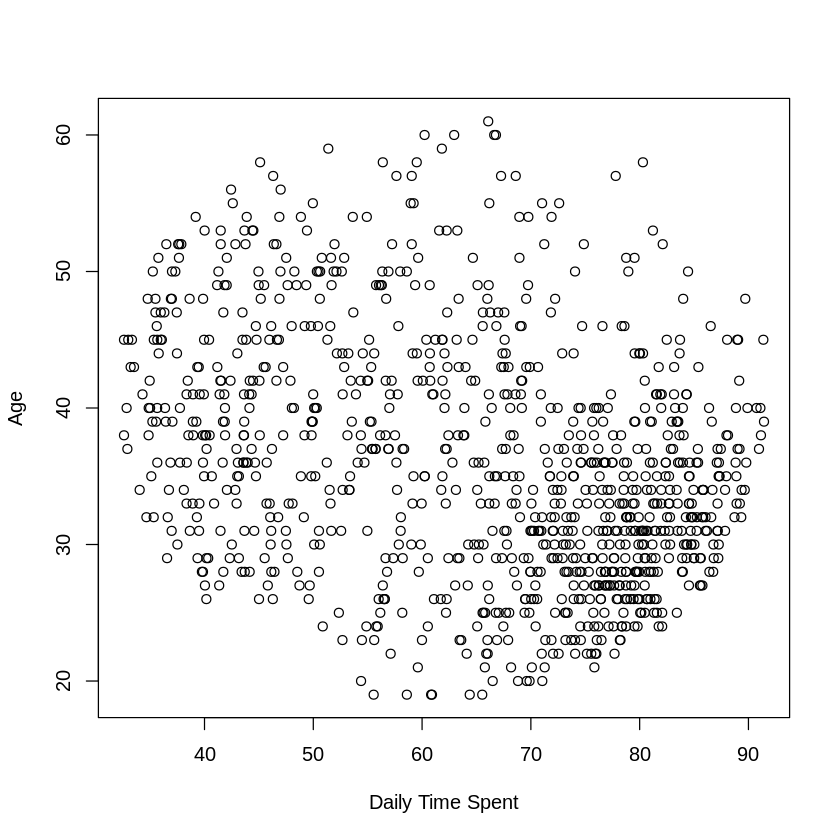

In [98]:
# A scatter plot of the dataset
plot(`Daily Time Spent on Site`, Age, xlab="Daily Time Spent", ylab="Age")

# **Conclusion**

* As observed there's a 51.9% chance that males will visit her site and a 48.1% chance that females will do so
* People in teh following countries are more likely to see and visit her site Czech Republic, France had 9 searches while those in Senegal, Afghanistan, Cyprus, Greece, Liberia, Peru, South AFrica, Turkey had 8 searches. 
* Most of the people who visit her site are of the ages of 31 and 36 with a count of 60 and 50 respectively
* There's an equal chance of those who clicked on the add and who didn't with a probability of 0.5 for both cases.

* A product should be created to encourage the viewership in countries like Andorra, Argentina had 2 searches and Ruba, Bermuda,  had 1 search